In [1]:
import cupy as cp
import numpy as np
import matplotlib.pyplot as plt

# Task 10. Saxpy
By using `CuPy`, implement `SAXPY` function. The function is described in the picture.

### 10.1 
**Q1 Difference between CuPy and NumPy**

NumPy is designed to run on CPU so the parallelization capabilities are limited by the number of available CPU cores. CuPy is the implementation of Numpy adapted to be run on GPU through the CUDA library. Therefore, the usage of CuPy allows achieving a superior speed-up utilizing GPU resources.

**Q2 How does CuPy handles data transfer between CPU and GPU**

CuPy uses memory pool for memory allocations by default. For the purposes of CPU-to-GPU data transfer CuPy used pinned memory pool (non-swappable CPU memory). The memory pool significantly improves the performance by mitigating the overhead of memory allocation and CPU/GPU synchronization.



### 10.2 SAXPY implementation

In [2]:
def saxpy(x: cp.array, y: cp.array, a: float) -> cp.array:
    assert x.shape[0] == y.shape[0], 'x and y should be the same lenth!'
    return a * x + y

### 10.3 NumPy vs CuPy profiling

In [3]:
out_cupy, out_numpy = [], []
alpha : float = 5
for n in range(3, 8):
    size : int = 10**n
    arr_cupy, arr_numpy  = cp.random.random(size), np.random.random(size)
    
    res_cupy  = %timeit -n 100 -o saxpy(arr_cupy, arr_cupy, alpha)
    res_numpy = %timeit -n 100 -o saxpy(arr_numpy, arr_numpy, alpha)
    
    out_cupy.append((size, res_cupy.average, res_cupy.stdev))
    out_numpy.append((size, res_numpy.average, res_numpy.stdev))

The slowest run took 150.28 times longer than the fastest. This could mean that an intermediate result is being cached.
677 µs ± 1.58 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.67 µs ± 1.75 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
31.1 µs ± 470 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)
10.8 µs ± 1.99 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
31.8 µs ± 1.39 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
135 µs ± 6.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
31.5 µs ± 1.42 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.28 ms ± 16.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
The slowest run took 24.08 times longer than the fastest. This could mean that an intermediate result is being cached.
198 µs ± 270 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
34.9 ms ± 1.29 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [4]:
out_cupy, out_numpy= np.array(out_cupy), np.array(out_numpy)
arr_size, time_cupy  = out_cupy[:,0], out_cupy[:,1]
time_numpy = out_numpy[:,1]

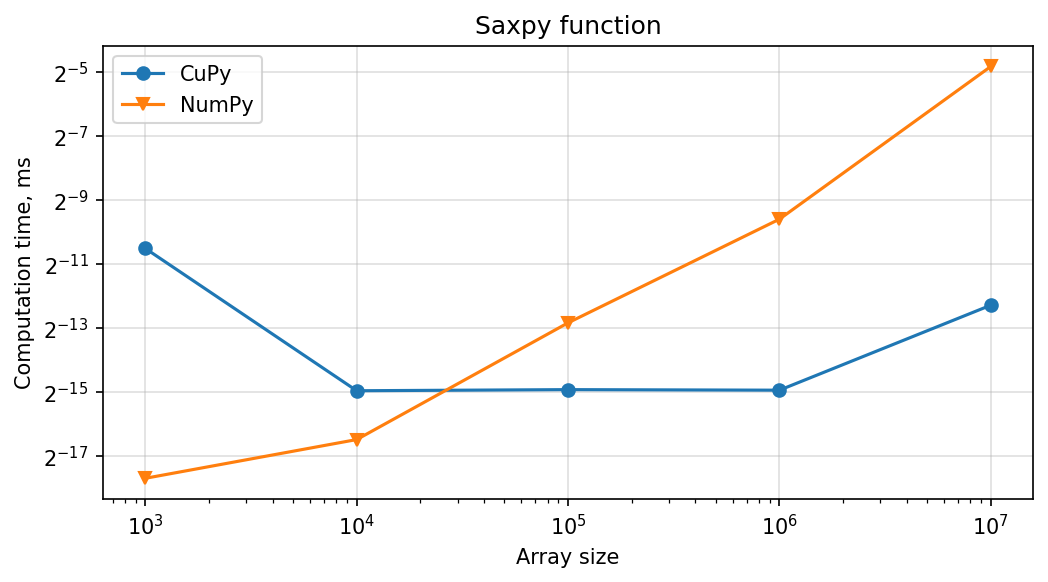

In [5]:
fig, ax = plt.subplots(figsize=(8,4), dpi=150)
ax.plot(arr_size, time_cupy, '-o', label='CuPy')
ax.plot(arr_size, time_numpy, '-v', label='NumPy')
ax.set_xticks(arr_size)
ax.grid(alpha=.4)
ax.set_xscale('log',base=10)
ax.set_yscale('log',base=2)
ax.set_xlabel('Array size')
ax.set_ylabel('Computation time, ms')
plt.legend()
plt.title('Saxpy function')
plt.show()

# Task 11. CuPy-based Bifurcation map

By using **CuPy**, reimplement bifurcation map (Task 1).

### 11.1 CuPy & NumPy implementation (single function)

In [6]:
r_start, r_stop = 2.5, 4.0

def log_map(r: cp.array, x: cp.array)-> float:
    return r * x * (1 - x)

def bifurcation_rx(n : int=10000, iterations : int =500, cupy : bool=False) -> list:
    if cupy:
        r, x = cp.linspace(r_start, r_stop, n), cp.linspace(0, 1, n) # CuPy arrays
    else:
        r, x = np.linspace(r_start, r_stop, n), np.linspace(0, 1, n) # NumPy arrays
    rx_values = []
    for i in range(iterations):
        x = log_map(r, x)
        if i >= (iterations - 100): # Treashlod
            rx_values.append((r, x))
    return rx_values

def plot_bifurcation(rx_values: list) -> None:
    fig, ax1 = plt.subplots(figsize=(16, 8), dpi=200)
    for r, x in rx_values:
        ax1.plot(r, x, ',') # Use a small marker to faster rende
        ax1.set_ylim(0, 1)
    ax1.set_xlim(r_start, r_stop)
    ax1.set_title("Bifurcation diagram")
    ax1.set_xlabel('$r$', fontsize=16)
    ax1.set_ylabel('$X_t$', fontsize=16)
    plt.grid(alpha=.4)
    plt.show()

### 11.2 NumPy vs CuPy profiling

In [7]:
out_cupy, out_numpy = [], []
for n in range(3, 7):
    n_size : int = 10**n
        
    res_cupy  = %timeit -n 10 -o bifurcation_rx(n_size, cupy=True)
    res_numpy = %timeit -n 10 -o bifurcation_rx(n_size)
    
    out_cupy.append((n_size, res_cupy.average))
    out_numpy.append((n_size, res_numpy.average))

The slowest run took 5.21 times longer than the fastest. This could mean that an intermediate result is being cached.
34.6 ms ± 31.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
2.81 ms ± 46.3 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
21.9 ms ± 346 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
10.9 ms ± 1.92 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
21.6 ms ± 157 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
155 ms ± 3.63 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
61 ms ± 1.43 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.44 s ± 13.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [8]:
out_cupy = np.array(out_cupy)
out_numpy = np.array(out_numpy)

In [9]:
size, time_cp = out_cupy[:,0], out_cupy[:,1]
time_np = out_numpy[:,1]

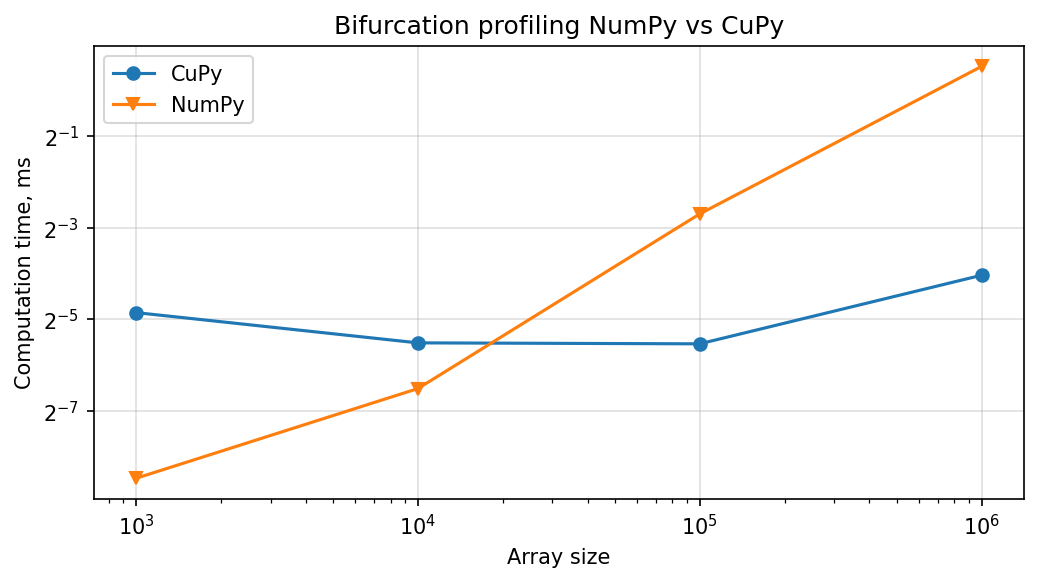

In [10]:
fig, ax = plt.subplots(figsize=(8,4), dpi=150)
ax.plot(size, time_cp, '-o', label='CuPy')
ax.plot(size, time_np, '-v', label='NumPy')
ax.set_xticks(size)
ax.grid(alpha=.4)
ax.set_xscale('log',base=10)
ax.set_yscale('log',base=2)
ax.set_xlabel('Array size')
ax.set_ylabel('Computation time, ms')
plt.legend()
plt.title('Bifurcation profiling NumPy vs CuPy')
plt.show()

## Task 12. Histogram


<u>By using <i><strong>CuPy</strong></i>:</u>
* Implement the suggested function:
$$
 f(x) = (z^2(x) + z^3(x) - 200 \,\, z^4(x) )\,\,\sin(\,\,100000\,\,(x + 0.5)\,\,),
 \\
 \text{where    }\:\:\: z(x) = \sin(3\,\,x)-0.5
$$
* Plot function on the $x$ interval $[0,\,\, 1]$. Number of points = 10000000.
* Get minimal and maximal values of function on the interval $[0,\,\, 1]$: $f_{min}$ and $f_{max}$.
* Divide $y=f(x), \: (x \in [0,\,\, 1]) \:$ interval $[f_{min}, f_{max}]$ into $10$ $y=f(x)$ subintervals of length $\delta$ equal to $0.1 \,\, (f_{max}-f_{min})$: $[f_{min},\,\, f_{min} + \delta],\,\, [f_{min}+ \delta,\,\, f_{min} + 2 \,\, \delta],\,\, \dots,\,\, [f_{max}- \delta,\,\, f_{max}]$.
* Compute number of $y=f(x), \: (x \in [0,\,\, 1]) \:$ values in each subinterval. Use $\operatorname{cp.sum(\dots)}$
* Plot histogram.

In [11]:
def z(x):
    return np.sin(3 * x) - 0.5

def f(x):
    return (z(x) ** 2 + z(x) ** 3 - 200 * z(x) ** 4) * np.sin(100000 * (x + 0.5))

In [12]:
x_val = np.linspace(0, 1, 10000000)

f_val = f(x_val)

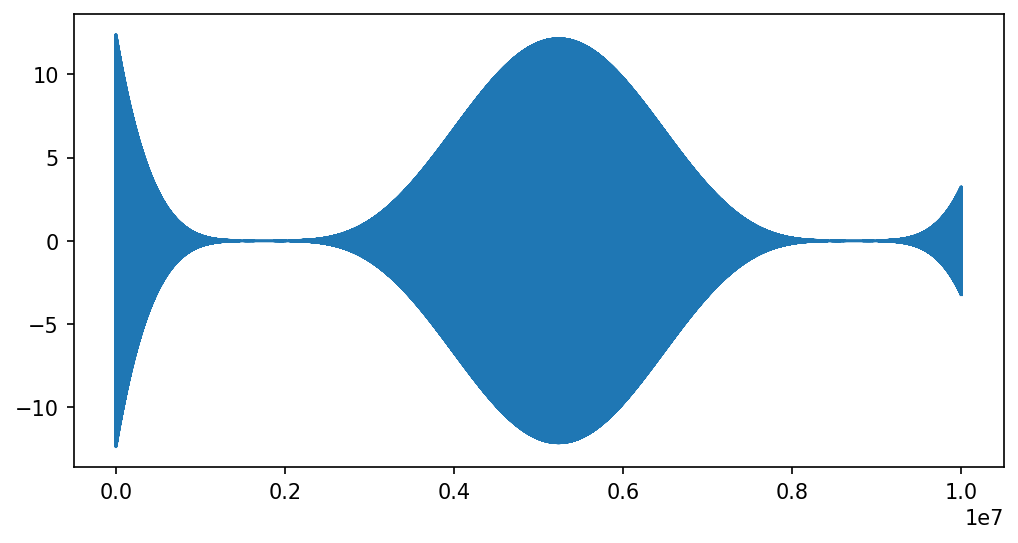

In [13]:
fig, ax = plt.subplots(figsize=(8, 4), dpi=150)
ax.plot(f_val)
plt.show()

In [14]:
f_min, f_max = f_val.min(), f_val.max()

delta = abs(f_min - f_max)

intervals = np.empty((10, 2))
for i, _ in enumerate(intervals):
    f_right = f_min + delta * 0.1
    intervals[i] = (f_min, f_right)
    f_min = f_right

hist = np.zeros(10)
for i, (left, right) in enumerate(intervals):
    hist[i] = np.sum((left <= f_val) & (f_val<= right))

inter = np.array(intervals)[:,0]

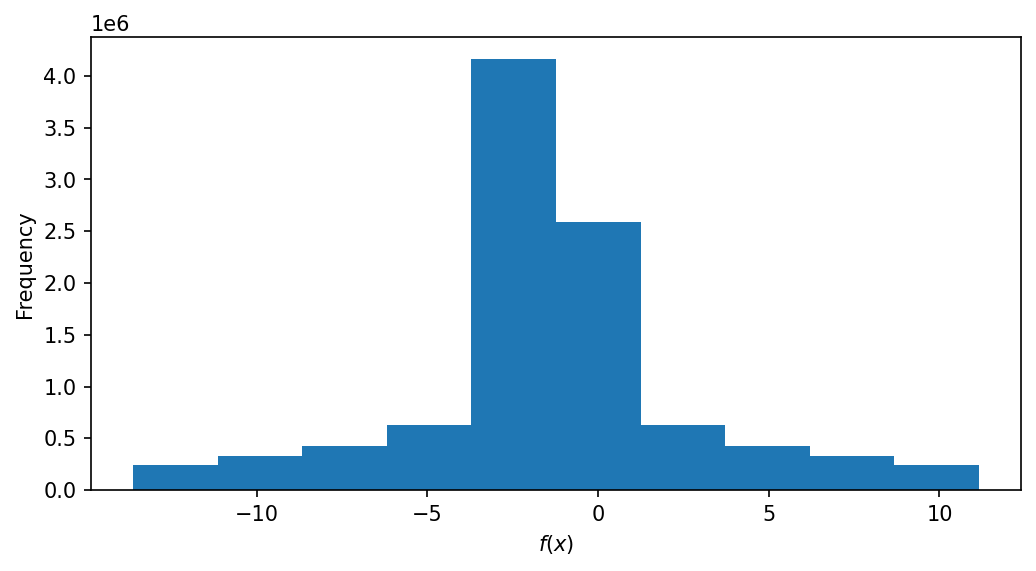

In [15]:
fig, ax = plt.subplots(figsize=(8,4), dpi=150)
ax.bar(x=inter,height=hist, width=2.5)
ax.set_xlabel('$f(x)$')
ax.set_ylabel('Frequency')
plt.show()